In [1]:
# Librerias
from datetime import date, datetime
from sqlalchemy import create_engine
import re
import os
import smtplib
import time
import configparser
# Manipulacion y tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import hvplot.pandas
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams["figure.figsize"] = (12, 8)
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

In [2]:
# Modelacion Arima

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Auto Arima

from pmdarima import auto_arima

# Metrica de evaluacion
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [3]:
# Evaluaciones de Modelos

def evaluacion_metricas(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true-y_pred)/y_true)) *100
    print('Evaluación de las metricas resultados:-')
    print(f'MSE es: {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE es: {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE es: {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE es: {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R^2 es: {metrics.r2_score(y_true, y_pred)}', end = '\n\n')

In [4]:
from prophet import Prophet

In [5]:
df = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Refunds')
df.head()

,Fecha,Amazon,eBay,Shopify,Google,Walmart,Total
0,2020-01-01,421.27,0,0,0.0,0,421.27
1,2020-01-02,5546.81,0,0,0.0,0,5546.81
2,2020-01-03,7327.57,0,0,0.0,0,7327.57
3,2020-01-04,2726.78,0,0,0.0,0,2726.78
4,2020-01-05,1101.16,0,0,0.0,0,1101.16


In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')
df = df.drop(['Amazon','eBay','Shopify','Walmart', 'Google'], axis= 1)
df.head()

,Total
Fecha,
2020-01-01,421.27
2020-01-02,5546.81
2020-01-03,7327.57
2020-01-04,2726.78
2020-01-05,1101.16


In [7]:
df = df.reset_index()
profe = df.rename(columns={'Fecha':'ds', 'Total':'y'})
profe.head()

,ds,y
0,2020-01-01,421.27
1,2020-01-02,5546.81
2,2020-01-03,7327.57
3,2020-01-04,2726.78
4,2020-01-05,1101.16


In [8]:
m = Prophet(interval_width= 0.95, daily_seasonality = True)
m.fit(profe)

11:16:01 - cmdstanpy - INFO - Chain [1] start processing
11:16:02 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = m.make_future_dataframe(periods = 15, freq='D')
prophet_pred = m.predict(future)

In [10]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1912,2025-03-27,7043.715107,4692.548152,16073.786875,7041.789544,7046.342139,3438.902605,3438.902605,3438.902605,3611.768491,...,392.096914,392.096914,392.096914,-564.962799,-564.962799,-564.962799,0.0,0.0,0.0,10482.617713
1913,2025-03-28,7048.057558,5195.715095,16376.123046,7045.665498,7051.059684,4034.251117,4034.251117,4034.251117,3611.768491,...,943.438145,943.438145,943.438145,-520.955519,-520.955519,-520.955519,0.0,0.0,0.0,11082.308675
1914,2025-03-29,7052.400009,173.364961,11965.722626,7049.656495,7055.743744,-813.742343,-813.742343,-813.742343,3611.768491,...,-3937.708220,-3937.708220,-3937.708220,-487.802614,-487.802614,-487.802614,0.0,0.0,0.0,6238.657666
1915,2025-03-30,7056.742459,-1719.657626,9627.188893,7053.574347,7060.400324,-3296.375529,-3296.375529,-3296.375529,3611.768491,...,-6442.039341,-6442.039341,-6442.039341,-466.104679,-466.104679,-466.104679,0.0,0.0,0.0,3760.366930
1916,2025-03-31,7061.084910,3958.615420,15452.109299,7057.519642,7065.161938,2915.956789,2915.956789,2915.956789,3611.768491,...,-239.661899,-239.661899,-239.661899,-456.149803,-456.149803,-456.149803,0.0,0.0,0.0,9977.041699


In [11]:
prophet_pred2 = pd.DataFrame({'Date': prophet_pred[-15:]['ds'], 'Refunds_Pred':prophet_pred[-15:]['yhat']})

In [12]:
prophet_pred2 = prophet_pred2.set_index('Date')

In [13]:
prophet_pred2.index.freq ='D'

In [14]:
prophet_pred2

,Refunds_Pred
Date,
2025-03-17,9060.199555
2025-03-18,17764.626608
2025-03-19,10362.401415
2025-03-20,9942.447157
2025-03-21,10581.626700
2025-03-22,5787.635510
2025-03-23,3367.994947
2025-03-24,9650.842902
2025-03-25,18350.135432


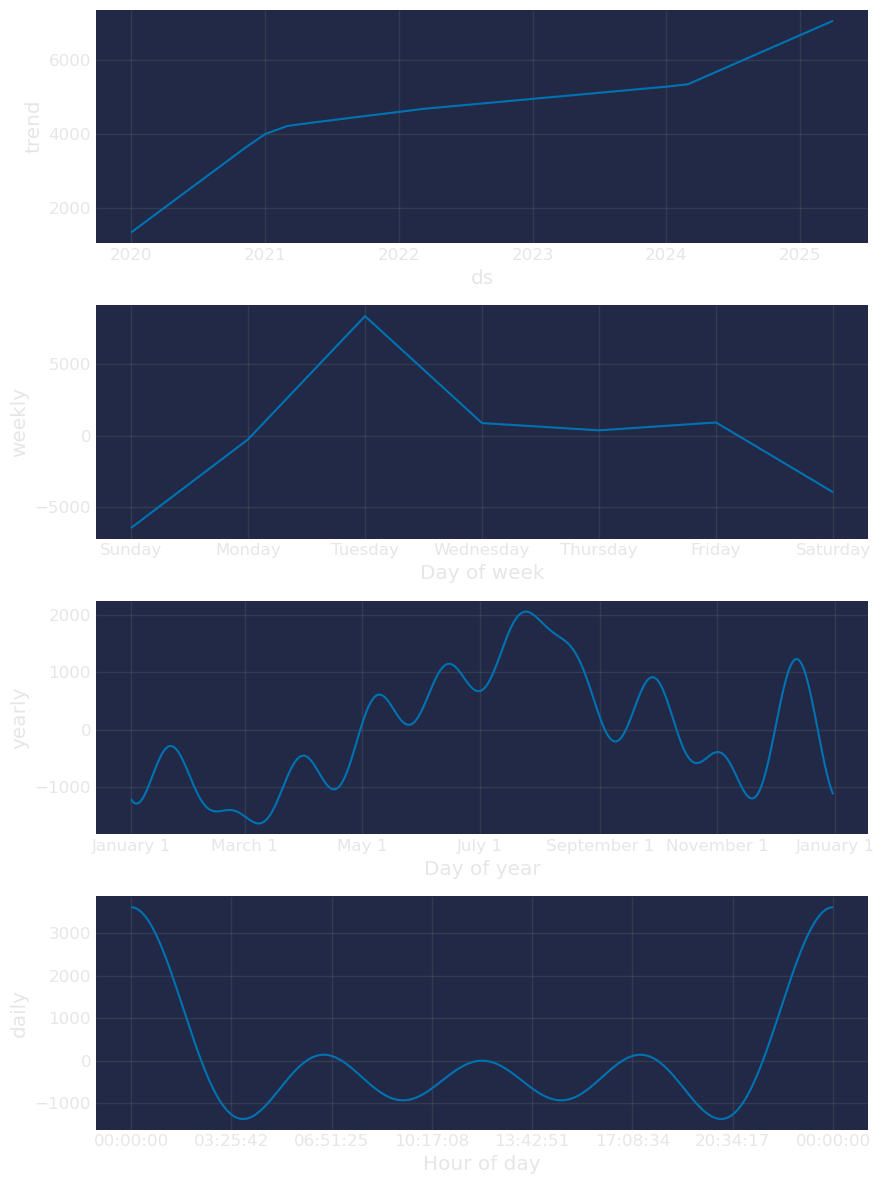

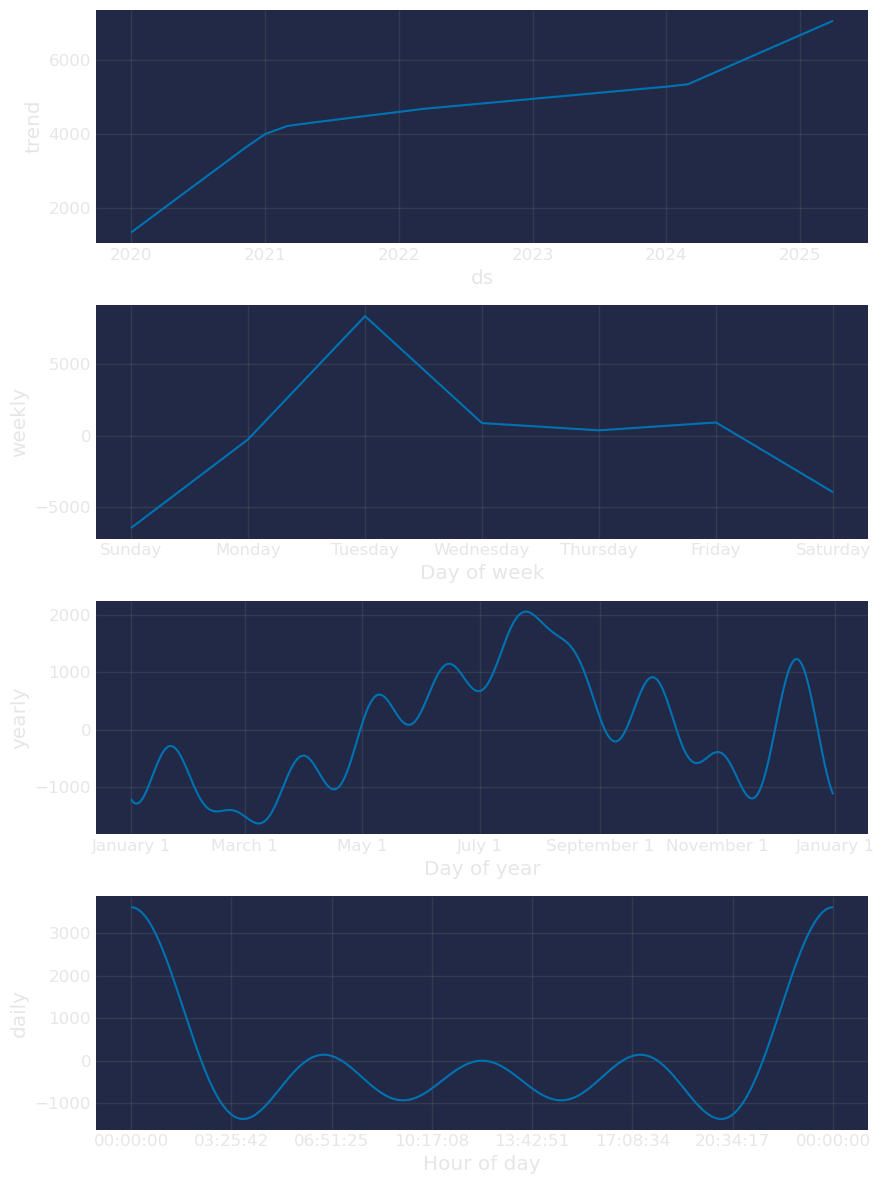

In [15]:
m.plot_components(prophet_pred)

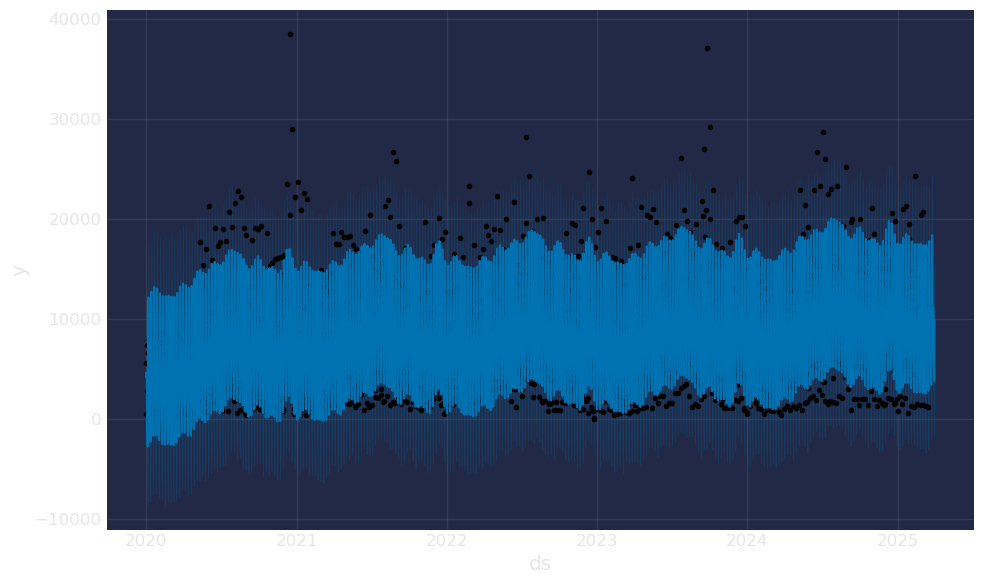

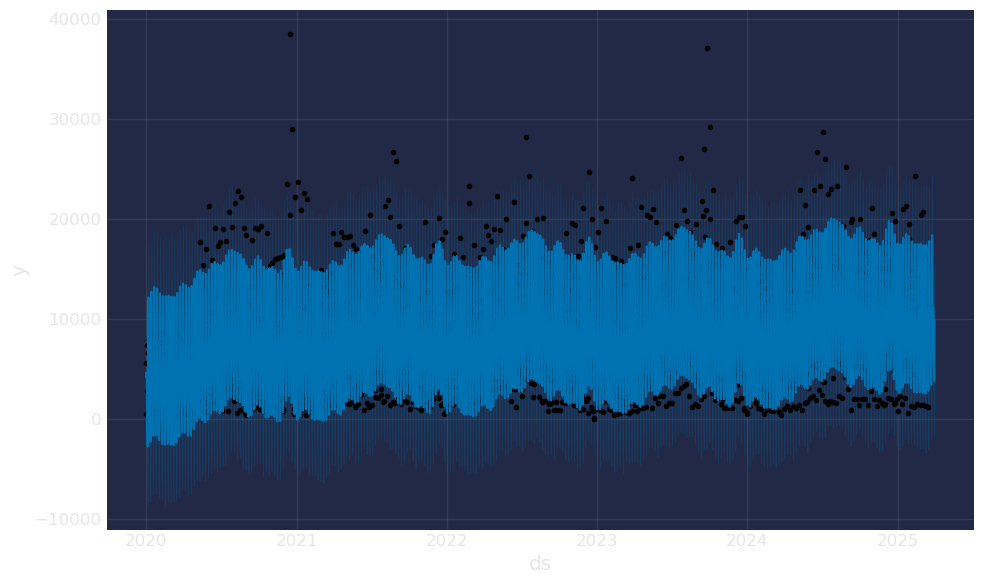

In [16]:
m.plot(prophet_pred)

In [17]:
fig = px.line(prophet_pred2, x=prophet_pred2.index, y ='Refunds_Pred', template='plotly_dark', title='Predicciones con el modelo de Prophet')
fig.show()

# Modelo de ventas

In [18]:
ventas = pd.read_excel('Datos de refunds y ventas.xlsx', sheet_name='Ventas')
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'])
#ventas = ventas[ventas['Fecha'] >= '2020-05-01']
ventas.head()

,Fecha,Total
0,2020-01-01,114838.8201
1,2020-01-02,132846.9601
2,2020-01-03,130644.7101
3,2020-01-04,120840.9203
4,2020-01-05,129750.7500


In [19]:
ventas = ventas.set_index('Fecha')
ventas.head()

,Total
Fecha,
2020-01-01,114838.8201
2020-01-02,132846.9601
2020-01-03,130644.7101
2020-01-04,120840.9203
2020-01-05,129750.7500


In [20]:
ventas = ventas.reset_index()
profe_sales = ventas.rename(columns={'Fecha':'ds', 'Total':'y'})
profe_sales.head()

,ds,y
0,2020-01-01,114838.8201
1,2020-01-02,132846.9601
2,2020-01-03,130644.7101
3,2020-01-04,120840.9203
4,2020-01-05,129750.7500


In [21]:
profe_sales.tail()

,ds,y
1897,2025-03-12,259193.3699
1898,2025-03-13,247084.2303
1899,2025-03-14,194850.4198
1900,2025-03-15,185505.9100
1901,2025-03-16,220173.0000


In [22]:
a = Prophet(interval_width= 0.95, daily_seasonality = True)
a.fit(profe_sales)

11:16:04 - cmdstanpy - INFO - Chain [1] start processing
11:16:05 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future = a.make_future_dataframe(periods = 15, freq='D')
prophet_pred_sales = a.predict(future)

In [24]:
prophet_pred_sales.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1912,2025-03-27,211169.042016,198145.598037,330239.708837,211112.613177,211274.120676,52728.343076,52728.343076,52728.343076,35652.187428,...,4016.353711,4016.353711,4016.353711,13059.801937,13059.801937,13059.801937,0.0,0.0,0.0,263897.385092
1913,2025-03-28,211361.403029,184148.647451,322622.804459,211283.006195,211487.000365,40938.100805,40938.100805,40938.100805,35652.187428,...,-9253.769824,-9253.769824,-9253.769824,14539.683202,14539.683202,14539.683202,0.0,0.0,0.0,252299.503834
1914,2025-03-29,211553.764041,164573.361187,297959.735425,211462.935377,211700.190437,19107.821099,19107.821099,19107.821099,35652.187428,...,-32417.863441,-32417.863441,-32417.863441,15873.497112,15873.497112,15873.497112,0.0,0.0,0.0,230661.585140
1915,2025-03-30,211746.125054,173349.460001,307999.441239,211633.118748,211908.045365,29655.413239,29655.413239,29655.413239,35652.187428,...,-23049.026378,-23049.026378,-23049.026378,17052.252190,17052.252190,17052.252190,0.0,0.0,0.0,241401.538293
1916,2025-03-31,211938.486066,228112.506545,360210.644140,211816.366909,212120.366010,80427.099380,80427.099380,80427.099380,35652.187428,...,26704.098889,26704.098889,26704.098889,18070.813064,18070.813064,18070.813064,0.0,0.0,0.0,292365.585446


In [25]:
prophet_pred2_sales = pd.DataFrame({'Date': prophet_pred_sales[-15:]['ds'], 'Sales_Pred':prophet_pred_sales[-15:]['yhat']})

In [26]:
prophet_pred2_sales = prophet_pred2_sales.set_index('Date')

In [27]:
prophet_pred2_sales.index.freq ='D'

In [28]:
prophet_pred2_sales

,Sales_Pred
Date,
2025-03-17,266010.724385
2025-03-18,261776.902910
2025-03-19,256939.538965
2025-03-20,249561.295890
2025-03-21,238462.502029
2025-03-22,217471.142516
2025-03-23,228987.301004
2025-03-24,280836.444206
2025-03-25,276615.484590


In [29]:
fig = px.line(prophet_pred2_sales, x=prophet_pred2_sales.index, y ='Sales_Pred', template='plotly_dark', title='Predicciones con el Modelo de Prophet')
fig.show()

In [30]:
prophet_pred2['Sales Pred'] = prophet_pred2_sales['Sales_Pred']
print(prophet_pred2.head())
prediccion_prophet = prophet_pred2
prediccion_prophet.to_excel('predicciones prophet.xlsx', index = True)

            Refunds_Pred     Sales Pred
Date                                   
2025-03-17   9060.199555  266010.724385
2025-03-18  17764.626608  261776.902910
2025-03-19  10362.401415  256939.538965
2025-03-20   9942.447157  249561.295890
2025-03-21  10581.626700  238462.502029


In [31]:
prediccion_prophet.tail()

,Refunds_Pred,Sales Pred
Date,,
2025-03-27,10482.617713,263897.385092
2025-03-28,11082.308675,252299.503834
2025-03-29,6238.657666,230661.585140
2025-03-30,3760.366930,241401.538293
2025-03-31,9977.041699,292365.585446


In [32]:
ventas.head()

,Fecha,Total
0,2020-01-01,114838.8201
1,2020-01-02,132846.9601
2,2020-01-03,130644.7101
3,2020-01-04,120840.9203
4,2020-01-05,129750.7500


In [33]:
import plotly.express as px


df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')
historia_refunds = df.tail(31)

fig_refunds = px.line(historia_refunds, x=historia_refunds.index, y='Total', template='plotly_dark', title='Historial de Refunds y Predicciones')
fig_refunds.add_trace(go.Scatter(x=prediccion_prophet.index, y=prediccion_prophet['Refunds_Pred'], mode='lines', name='Refunds Predicciones'))

fig_refunds.update_layout(xaxis_title='Date', yaxis_title='Refunds', legend_title='Leyenda')

# Mostrar el gráfico
fig_refunds.show()

ventas['Fecha'] = pd.to_datetime(ventas['Fecha'])
ventas = ventas.set_index('Fecha')
historia_ventas = ventas.tail(31)

# Crear gráfico para ventas con datos históricos
fig_ventas = px.line(historia_ventas, x=historia_ventas.index, y='Total', template='plotly_dark', title='Historial de Ventas y Predicciones')
fig_ventas.add_trace(go.Scatter(x=prediccion_prophet.index, y=prediccion_prophet['Sales Pred'], mode='lines', name='Ventas Predicciones'))

# Personalizar diseño
fig_ventas.update_layout(xaxis_title='Date', yaxis_title='Ventas', legend_title='Leyenda')

# Mostrar el gráfico
fig_ventas.show()